[과제] employees 테이블을 불러와서 다음사항을 수행하세요.

- 컬럼명을 포함하여 employees 테이블을 데이터프레임으로 출력
- department_id별 평균 연봉을 출력
- 부서별 평균 연봉을 수평 그래프로 시각화

In [2]:
import cx_Oracle
db = cx_Oracle.connect("KEVIN_PDB","KEVIN","localhost:1521/xepdb1")
cursor = db.cursor()
cursor.execute('select * from employees')
x = cursor.fetchall()
df = pd.DataFrame(x)
cursor.execute("""select column_name from user_tab_columns where table_name='EMPLOYEES'""")
col = cursor.fetchall()
col_list = []
for i in col:
    for j in i:
        col_list.append(j)
        
df.columns = col_list
df.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,198,Donald,OConnell,DOCONNEL,650.507.9833,2007-06-21,SH_CLERK,2600.0,NaN,124.0,50.0
1,199,Douglas,Grant,DGRANT,650.507.9844,2008-01-13,SH_CLERK,2600.0,NaN,124.0,50.0
2,200,Jennifer,Whalen,JWHALEN,515.123.4444,2003-09-17,AD_ASST,4400.0,NaN,101.0,10.0
3,201,Michael,Hartstein,MHARTSTE,515.123.5555,2004-02-17,MK_MAN,13000.0,NaN,100.0,20.0
4,202,Pat,Fay,PFAY,603.123.6666,2005-08-17,MK_REP,6000.0,NaN,201.0,20.0


In [4]:
sales_avg = df.groupby('DEPARTMENT_ID').mean().reset_index()
s1 = sales_avg[['DEPARTMENT_ID','SALARY']]
s1.head()

,DEPARTMENT_ID,SALARY
0,10.0,4400.000000
1,20.0,9500.000000
2,30.0,4150.000000
3,40.0,6500.000000
4,50.0,3475.555556


<AxesSubplot:xlabel='SALARY', ylabel='DEPARTMENT_ID'>

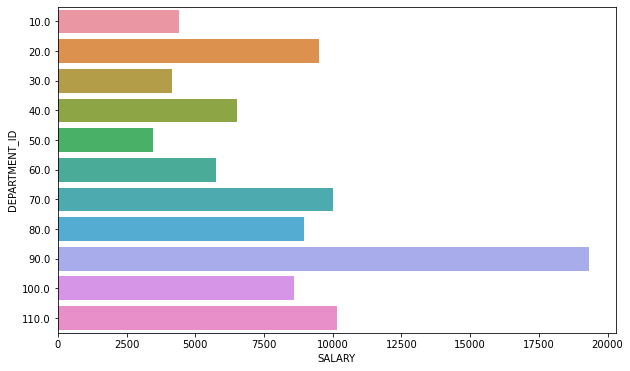

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='SALARY', y='DEPARTMENT_ID', data=s1, orient='h')

[과제] PURPROD 테이블을 불러와서 다음사항을 수행하세요.

- 고객별 2014년 2015년 총구매액 및 평균구매액 출력
- 고객별 2014 VS 2015 총구매액 기준 성장율

In [11]:
import cx_Oracle
import pandas as pd
con = cx_Oracle.connect("LTM_PDB","LTM","localhost:1521/xepdb1")
cursor = con.cursor()
cursor.execute("select * from PURBYYEAR")
x = cursor.fetchall()

cursor.execute("select column_name from user_tab_columns where table_name='PURBYYEAR'")
col = cursor.fetchall()
col_list = []
for i in col:
    for j in i:
        col_list.append(j)

df = pd.DataFrame(x,columns=col_list)
df.head()

,고객번호,YEAR,총구매,구매평균
0,00001,2014,54041667,90979
1,00001,2015,31000883,66957
2,00002,2014,46245330,75812
3,00002,2015,53635430,105999
4,00003,2014,1893769,2563


In [12]:
df_pv1 = df.pivot(index='고객번호',columns='YEAR',values='총구매')
df_pv2 = df_pv1.reset_index()
df_pv3= df_pv2.set_index(keys=['고객번호'])
df_pv3.head()

YEAR,2014,2015
고객번호,,
00001,54041667.0,31000883.0
00002,46245330.0,53635430.0
00003,1893769.0,1271398.0
00004,9299616.0,7394194.0
00005,7685880.0,5551190.0


In [13]:
df_pv3['성장율'] = (df_pv3[2015]-df_pv3[2014])/df_pv3[2014] 
df_pv3.head()

YEAR,2014,2015,성장율
고객번호,,,
00001,54041667.0,31000883.0,-0.426352
00002,46245330.0,53635430.0,0.159802
00003,1893769.0,1271398.0,-0.328641
00004,9299616.0,7394194.0,-0.204893
00005,7685880.0,5551190.0,-0.277742
